# Modelos de Regresion Lineal

## Modelo con datos simulados

**y = a + b * x**

* x : 100 valores distribuidos segun una N(1.5, 2.5)

* Ye = 8 + 1.8 + x + e

* **e** estara distribuida segun una N(0, 0.8

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 8 + 1.8 * x

In [5]:
y_act = 8 + 1.8 *x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [17]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_act": y_act_list,
        "y_pred": y_pred_list
    
    }
)

In [10]:
data.head()

,x,y,y_pred
0,2.709309,11.385923,12.876756
1,1.772821,10.761247,11.191077
2,5.465905,17.738633,17.838629
3,2.795349,13.059581,13.031628
4,4.692409,17.135718,16.446337


In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [20]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

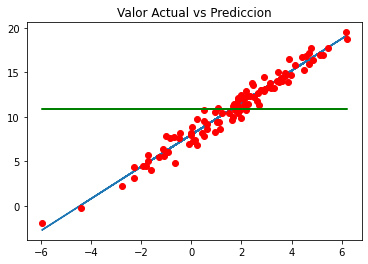

In [23]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Prediccion")

In [27]:
data["SSR"]=(data["y_pred"]-np.mean(y_act))**2
data["SSD"]=(data["y_pred"]-data["y_act"])**2
data["SST"]=(data["y_act"]-np.mean(y_act))**2

In [28]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,2.709309,11.385923,12.876756,4.153245,2.222581,0.299339
1,1.772821,10.761247,11.191077,0.124096,0.184754,0.006015
2,5.465905,17.738633,17.838629,48.997542,0.009999,47.607629
3,2.795349,13.059581,13.031628,4.808474,0.000781,4.931846
4,4.692409,17.135718,16.446337,31.444416,0.475247,39.651125


In [29]:
SSR =sum(data["SSR"])
SSD =sum(data["SSD"])
SST =sum(data["SST"])

In [30]:
SSR

1661.4911051745653

In [31]:
SSD

64.25737783977357

In [32]:
SST

1716.4984198613581

In [33]:
SSR+SSD

1725.748483014339

In [34]:
R2 = SSR/SST

In [35]:
R2

0.9679537632832568

(array([ 3.,  6., 13., 11., 15., 23., 15.,  7.,  5.,  2.]),
 array([-1.83787273, -1.45032871, -1.06278469, -0.67524067, -0.28769664,
         0.09984738,  0.4873914 ,  0.87493542,  1.26247944,  1.65002346,
         2.03756749]),
 <BarContainer object of 10 artists>)

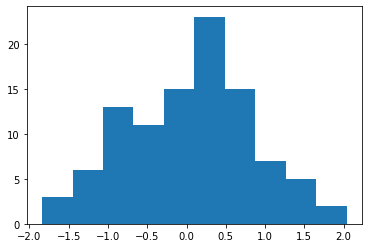

In [37]:
plt.hist(data['y_pred']-data["y_act"])